In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

# Import shapefile

In [2]:
#pd.set_option('display.width', 1000) 
map_df=gpd.read_file('Census_2010_Tracts.shp')
map_df['TRACT'].head(5)


0    760100
1    760200
2    760300
3    760400
4    760501
Name: TRACT, dtype: object

In [3]:
map_df['TRACT']=map_df['TRACT'].astype('int64')
map_df.shape

(1076, 34)

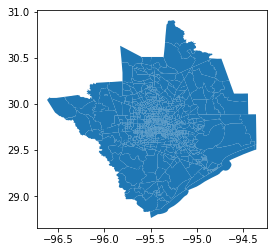

In [4]:
map_df.plot()

# Import Population Data

In [5]:
# Getting data from Social Explore
df=pd.read_csv("Census2010Pop.csv")
df.head()



,Geo_NAME,Geo_QName,Geo_FIPS,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_COUNTYSC,Geo_COUSUB,Geo_TRACT,SE_T002_001,SE_T002_002,SE_T002_006
0,Census Tract 1000,"Census Tract 1000, Harris County, Texas",48201100000,140,0,48,201,22,NaN,100000,4690,3186.860,1.471668
1,Census Tract 2101,"Census Tract 2101, Harris County, Texas",48201210100,140,0,48,201,22,NaN,210100,9652,37943.470,0.254378
2,Census Tract 2104,"Census Tract 2104, Harris County, Texas",48201210400,140,0,48,201,22,NaN,210400,5328,7605.897,0.700509
3,Census Tract 2105,"Census Tract 2105, Harris County, Texas",48201210500,140,0,48,201,22,NaN,210500,4882,5875.718,0.830877
4,Census Tract 2106,"Census Tract 2106, Harris County, Texas",48201210600,140,0,48,201,22,NaN,210600,5497,6100.320,0.901100


# Merge Shapefile with Population Density data

In [6]:
merged=map_df.set_index('TRACT').join(df.set_index('Geo_TRACT'))
print(merged.shape)
merged.head(5)




(1076, 45)


,OBJECTID,STATE,COUNTY,SUM_POP100,SUM_HU100,SUM_TotPop,SUM_HispPo,SUM_NonHis,SUM_NHOneR,SUM_NH_Whi,...,Geo_FIPS,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_COUNTYSC,Geo_COUSUB,SE_T002_001,SE_T002_002,SE_T002_006
100000,208,48,201,4690,2322,4690,1070,3620,3581,2082,...,4.820110e+10,140.0,0.0,48.0,201.0,22.0,NaN,4690.0,3186.86,1.471668
200101,1067,48,407,6336,2658,6336,723,5613,5512,4764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200102,1068,48,407,10069,4149,10069,1676,8393,8261,7498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200200,1069,48,407,5001,3074,5001,282,4719,4653,3929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200300,1070,48,407,4978,3306,4978,199,4779,4701,4013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
new=merged.dropna(subset=['SE_T002_002'])
new.shape


(786, 45)

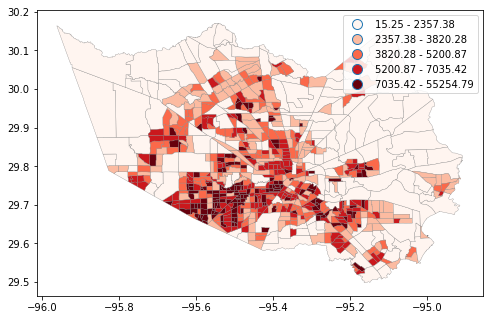

In [14]:
var='SE_T002_002'
#vmin, vmax=33,17754
fig,ax=plt.subplots(1,figsize=(8,6))
new.plot(column=var, scheme='quantiles',cmap='Reds', linewidth=0.3, ax=ax, edgecolor='0.5',legend=True)